In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [6]:
df.isna().any()

No       False
year     False
month    False
day      False
hour     False
pm2.5     True
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

In [7]:
data['pm2.5'].isna().sum()

2067

In [8]:
data['pm2.5'].fillna(data['pm2.5'].median(), inplace=True)

In [9]:
data['pm2.5'].isna().sum()

0

In [10]:
duplicates = data.duplicated().sum()

In [11]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   43824 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [12]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,97.357977,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,90.030249,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [13]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [14]:
df.set_index('datetime', inplace=True)

In [15]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,72.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,72.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,72.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,72.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,72.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


Text(0.5, 1.0, 'Air Quality, 2010-2015')

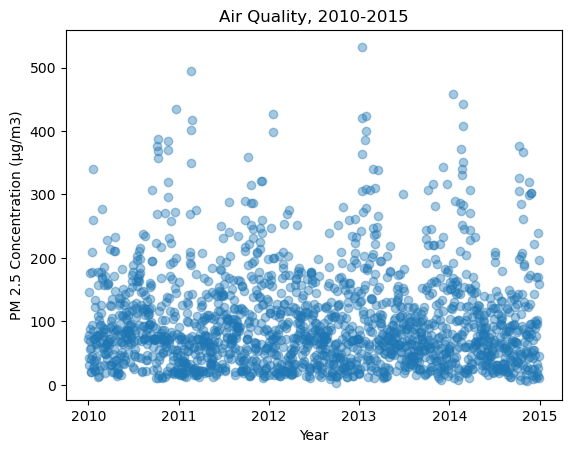

In [16]:
scatter_y = df['pm2.5'].resample('D').mean()
scatter_x = scatter_y.index
plt.scatter(x = scatter_x, y = scatter_y, alpha = 0.4)
plt.xlabel('Year')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality, 2010-2015')

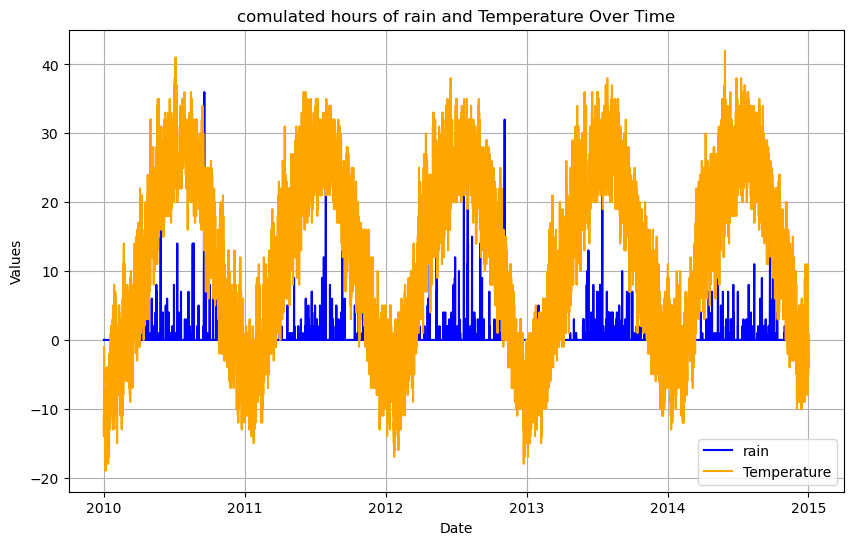

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ir'], label='rain', color='blue')
plt.plot(df.index, df['TEMP'], label='Temperature', color='orange')
plt.title('comulated hours of rain and Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

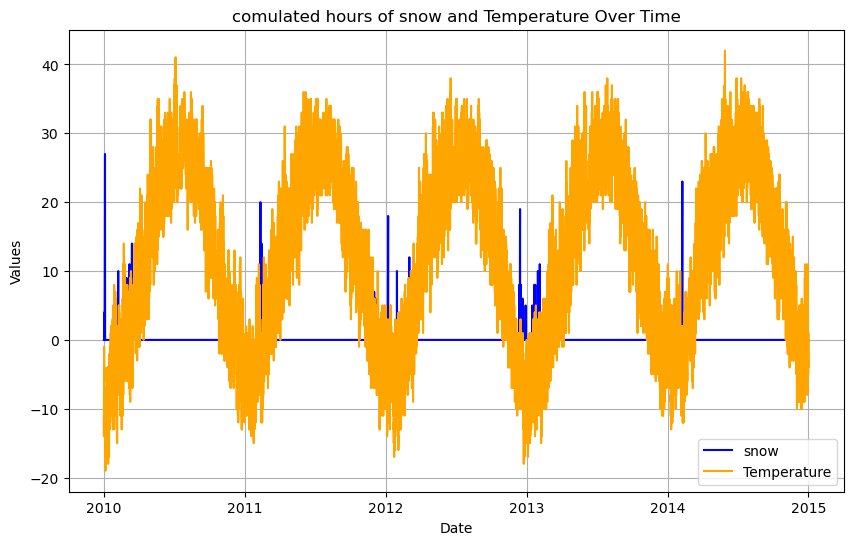

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Is'], label='snow', color='blue')
plt.plot(df.index, df['TEMP'], label='Temperature', color='orange')
plt.title('comulated hours of snow and Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

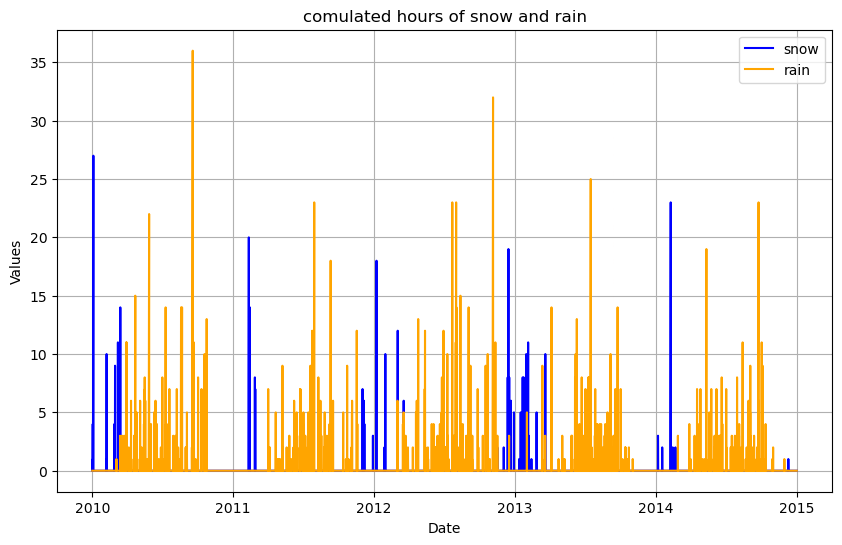

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Is'], label='snow', color='blue')
plt.plot(df.index, df['Ir'], label='rain', color='orange')
plt.title('comulated hours of snow and rain')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

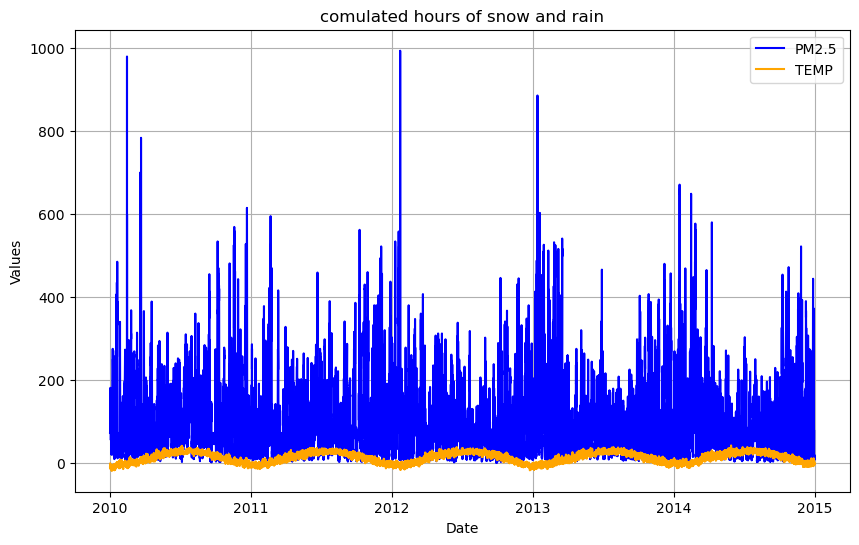

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['pm2.5'], label='PM2.5', color='blue')
plt.plot(df.index, df['TEMP'], label='TEMP', color='orange')
plt.title('comulated hours of snow and rain')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

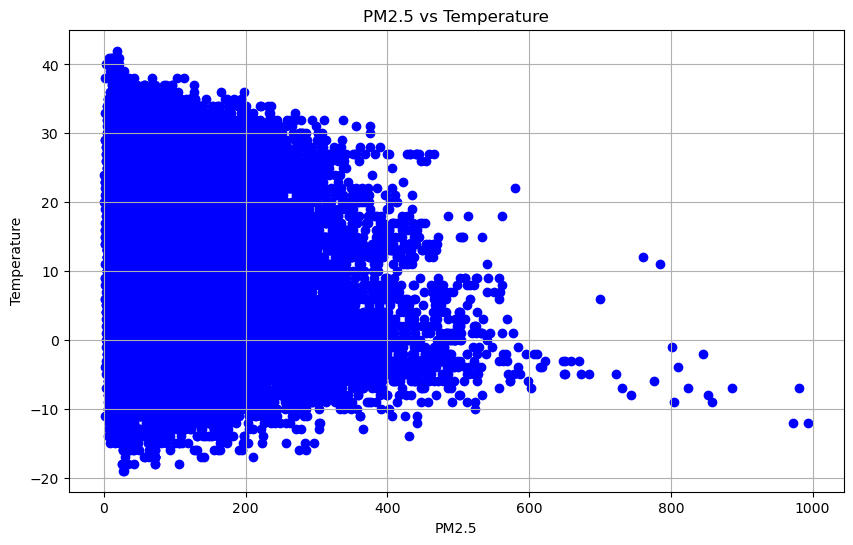

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pm2.5'], df['TEMP'], color='blue')
plt.title('PM2.5 vs Temperature')
plt.xlabel('PM2.5')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [22]:
df = pd.DataFrame(data)

In [23]:
# since wind direction contains some non numeric value we cannot consider
x = df[['DEWP','TEMP','PRES','Iws','Is','Ir']]
y = df['pm2.5']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
std_sc=StandardScaler()
x_train=std_sc.fit_transform(x_train)
x_test=std_sc.fit_transform(x_test)

In [64]:
ridge = Ridge(alpha=1.0)

In [65]:
ridge.fit(x_train, y_train)

Ridge()

In [66]:
y_pred = ridge.predict(x_test)

In [67]:
x_train_pred = ridge.predict(x_train)
x_test_pred = ridge.predict(x_test)

In [68]:
train_mse = mean_squared_error(y_train, x_train_pred)
test_mse = mean_squared_error(y_test, x_test_pred)

In [69]:
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Test Mean Squared Error: {test_mse:.2f}')

Training Mean Squared Error: 6317.49
Test Mean Squared Error: 6168.01


In [70]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [71]:
print(f'Training Root Mean Squared Error: {train_rmse:.2f}')
print(f'Test Root Mean Squared Error: {test_rmse:.2f}')

Training Root Mean Squared Error: 79.48
Test Root Mean Squared Error: 78.54


In [72]:
train_r2 = r2_score(y_train, x_train_pred)
test_r2 = r2_score(y_test, x_test_pred)

In [73]:
print(f'Training R² Score: {train_r2:.2f}')
print(f'Test R² Score: {test_r2:.2f}')

Training R² Score: 0.22
Test R² Score: 0.23


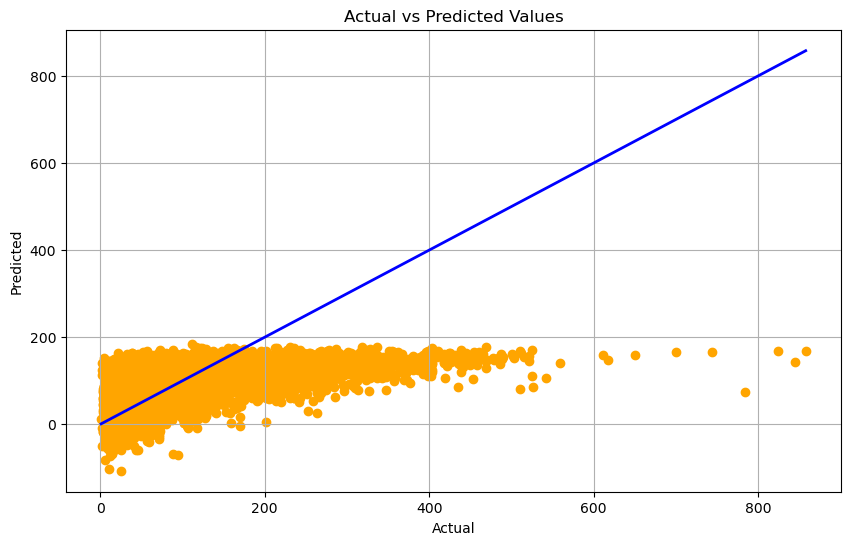

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='predicted',color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], label='actual', color='blue', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestRegressor(n_estimators=100, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score (Negative MSE): {best_score}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print(f"Test Score (R^2): {test_score}")

In [76]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
y_pred = rf.predict(x_test)

In [78]:
x_train_pred = rf.predict(x_train)
x_test_pred = rf.predict(x_test)

In [79]:
train_mse = mean_squared_error(y_train, x_train_pred)
test_mse = mean_squared_error(y_test, x_test_pred)

In [80]:
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Test Mean Squared Error: {test_mse:.2f}')

Training Mean Squared Error: 1002.81
Test Mean Squared Error: 5108.00


In [81]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [82]:
print(f'Training Root Mean Squared Error: {train_rmse:.2f}')
print(f'Test Root Mean Squared Error: {test_rmse:.2f}')

Training Root Mean Squared Error: 31.67
Test Root Mean Squared Error: 71.47


In [83]:
train_r2 = r2_score(y_train, x_train_pred)
test_r2 = r2_score(y_test, x_test_pred)

In [84]:
print(f'Training R² Score: {train_r2:.2f}')
print(f'Test R² Score: {test_r2:.2f}')

Training R² Score: 0.88
Test R² Score: 0.36


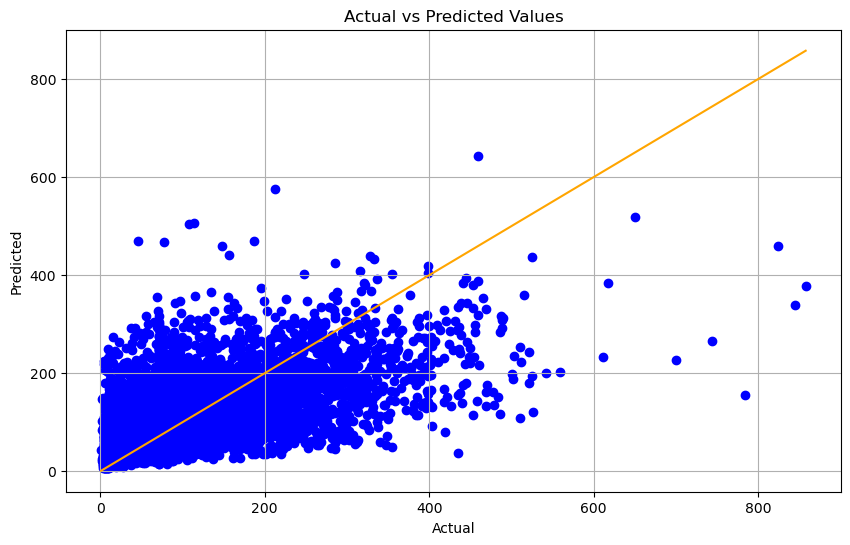

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [86]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_scores = []
test_scores = []
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(x_train, y_train)
    
    train_score = rf.score(x_train, y_train)
    train_scores.append(train_score)
    
    test_score = rf.score(x_test, y_test)
    test_scores.append(test_score)

In [87]:
print(f'Mean training accuracy: {np.mean(train_scores):.2f}')
print(f'Mean test accuracy: {np.mean(test_scores):.2f}')

Mean training accuracy: 0.87
Mean test accuracy: 0.36
